In [5]:
load('../etala_utilities.sage')

# 2012 Q1 Exam

## Problem 1
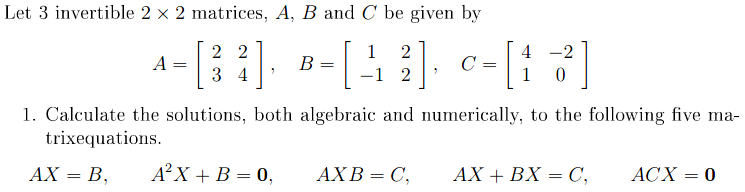

In [3]:
A = Matrix(SR, [[2, 2],
                [3, 4]])
B = Matrix(SR, [[ 1, 2],
                [-1, 2]])
C = Matrix(SR, [[4, -2],
                [1,  0]])

2

In order to ease calculations, the determinants of the three matrices are calculated in order to determine if they are invertible.  
The determinant of a $2 \times 2$ matrix $A = \begin{bmatrix} a & b \\ c & d \end{bmatrix}$ can be calculated as $det(A) = ad - cb$.

In [5]:
def determinant(mat):
    assert mat.nrows() == 2 and mat.ncols() == 2
    return mat[0][0]*mat[1][1] - mat[1][0]*mat[0][1]

det_A = determinant(A); show_var()
det_B = determinant(B); show_var()
det_C = determinant(C); show_var()

\text{det_A} = 2

\text{det_B} = 4

\text{det_C} = 2

Since none of the determinants are 0, A, B, and C are all invertible matrices.  
Now each of the matrix equations can be solved:  

### $AX = B$:
Rearranging the equation, X can be isolated: $AX = B = X = A^{-1}B $  
In order to calculate this, the inverse of A must be determined. This can be done for $2 \times 2$  matrices as described above using the following equation:  
$A^{-1} = \frac{1}{ad - cb} \begin{bmatrix} d & -b \\ -c & a \end{bmatrix}$

In [20]:
def inverse(mat):
    det = determinant(mat)
    assert det != 0
    return 1/det * Matrix(SR, [[ mat[1][1], -mat[0][1]],
                               [-mat[1][0],  mat[0][0]]])
A_inv = inverse(A); show_var()

\text{A_inv} = \left[\begin{array}{rr}
2 & -1 \\
-\frac{3}{2} & 1
\end{array}\right]

Using this, it is easy to calculate $X$ which becomes:  
$X =  \begin{bmatrix} 2 & -1 \\ -3/2 & 1 \end{bmatrix} \begin{bmatrix} 1 & 2 \\ -1 & 2 \end{bmatrix} = \begin{bmatrix} 3 & 2 \\ -5/2 & -1 \end{bmatrix} $



### $A^2X + B = 0$ 
Isolating X can be done as follows:  
$\begin{alignat}{2}
                 &&\quad A^2X + B & = 0  \\
\Leftrightarrow           && A^2X & = -B \\
\Leftrightarrow              && X & = \left(A^2\right)^{-1} \cdot -B \\
\Leftrightarrow              && X & = -\left(A^2\right)^{-1}B
 \end{alignat}$  
 Numerically that's:

In [18]:
X = -(A^2).inverse()*B; show_var()

\text{X} = \left[\begin{array}{rr}
-\frac{17}{2} & -5 \\
7 & 4
\end{array}\right]

### $AXB = C$
Rearranging:  
$\begin{alignat}{2}
                 &&\quad AXB & = C  \\
\Leftrightarrow        && XB & = A^{-1}C \\
\Leftrightarrow         && X & = A^{-1}CB^{-1}
 \end{alignat}$  
 And numerically:

In [19]:
X = A.inverse()*C*B.inverse(); show_var()

\text{X} = \left[\begin{array}{rr}
\frac{5}{2} & -\frac{9}{2} \\
-\frac{7}{4} & \frac{13}{4}
\end{array}\right]

### $AX + BX = C$
Rearranging:  
$\begin{alignat}{2}
                && \quad AX + BX & = C  \\
\Leftrightarrow     && (A + B) X & = C \\
\Leftrightarrow         && X & = (A + B)^{-1}C
 \end{alignat}$  
 Numerically: 

In [21]:
X = (A + B).inverse()*C; show_var()

\text{X} = \left[\begin{array}{rr}
2 & -\frac{6}{5} \\
-\frac{1}{2} & \frac{2}{5}
\end{array}\right]

### $ ACX = 0 $
Since the product of two invertible matrices is an invertible matrix, this has only the trivial solution (by the invertible matrix theorem):  
$X = \bs 0$

## Problem 2
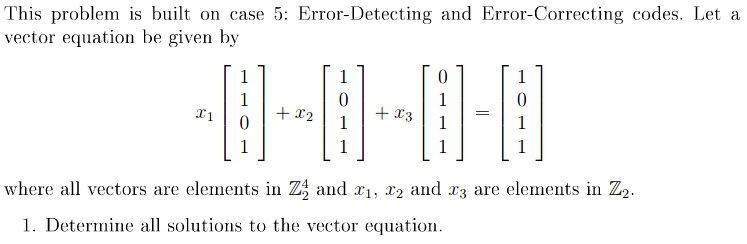

This can be rewritten as a matrix equation $Ax = b$ with $A$ and $b$ defined as follows:

In [18]:
A = Matrix(Integers(2), [[1, 1, 0], [1, 0, 1], [0, 1, 1], [1, 1, 1]]); show_var(approx=False)
b = vector(Integers(2), [1, 0, 1, 1]); show_var(approx=False)

\text{A} = \left[\begin{array}{rrr}
1 & 1 & 0 \\
1 & 0 & 1 \\
0 & 1 & 1 \\
1 & 1 & 1
\end{array}\right]

\text{b} = \left(1,\,0,\,1,\,1\right)

Creating the augmented matrix and using elementary row operations, this can be solved:

In [22]:
A_aug = A.augment(b, subdivide=True)
A_aug.add_multiple_of_row(1, 0, 1); show_var('A_aug', approx=False)
A_aug.swap_rows(2, 3); show_var('A_aug', approx=False)
A_aug.add_multiple_of_row(2, 0, 1); show_var('A_aug', approx=False)
A_aug.add_multiple_of_row(3, 1, 1); show_var('A_aug', approx=False)
A_aug.add_multiple_of_row(1, 2, 1); show_var('A_aug', approx=False)
A_aug.add_multiple_of_row(0, 1, 1); show_var('A_aug', approx=False)

\text{A_aug} = \left[\begin{array}{rrr|r}
1 & 1 & 0 & 1 \\
0 & 1 & 1 & 1 \\
0 & 1 & 1 & 1 \\
1 & 1 & 1 & 1
\end{array}\right]

\text{A_aug} = \left[\begin{array}{rrr|r}
1 & 1 & 0 & 1 \\
0 & 1 & 1 & 1 \\
1 & 1 & 1 & 1 \\
0 & 1 & 1 & 1
\end{array}\right]

\text{A_aug} = \left[\begin{array}{rrr|r}
1 & 1 & 0 & 1 \\
0 & 1 & 1 & 1 \\
0 & 0 & 1 & 0 \\
0 & 1 & 1 & 1
\end{array}\right]

\text{A_aug} = \left[\begin{array}{rrr|r}
1 & 1 & 0 & 1 \\
0 & 1 & 1 & 1 \\
0 & 0 & 1 & 0 \\
0 & 0 & 0 & 0
\end{array}\right]

\text{A_aug} = \left[\begin{array}{rrr|r}
1 & 1 & 0 & 1 \\
0 & 1 & 0 & 1 \\
0 & 0 & 1 & 0 \\
0 & 0 & 0 & 0
\end{array}\right]

\text{A_aug} = \left[\begin{array}{rrr|r}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 1 \\
0 & 0 & 1 & 0 \\
0 & 0 & 0 & 0
\end{array}\right]

Now it is clear that the solution to the equation is $\bs x = \begin{bmatrix} 0 \\ 1 \\ 0 \end{bmatrix}$

## Problem 3
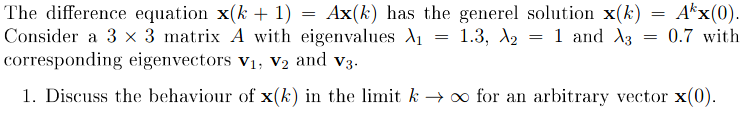

## Problem 4
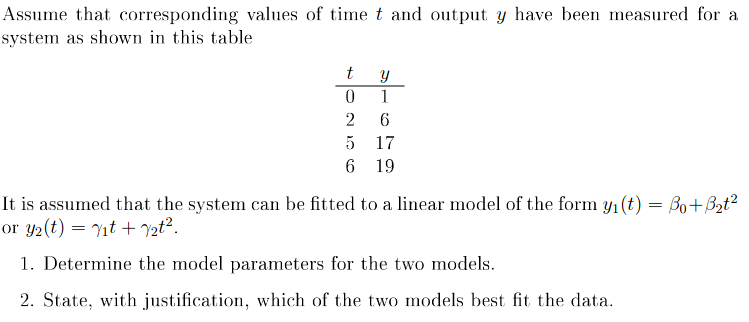

### 1.

Firstly a Matrix equation representing the two models are created:  
$ X \bs \beta = \bs y$ where $X = \begin{bmatrix} 1 & t_0^2 \\ \dots \\ 1 & t_n^2 \end{bmatrix}$, $\bs \beta = \begin{bmatrix} \beta_0 \\ \beta_2 \end{bmatrix} $, and $ \bs y = \begin{bmatrix} y_0 \\ \dots \\ y_n \end{bmatrix} $  
And for the second model:  
$ X \bs \gamma = \bs y$ where $X = \begin{bmatrix} t_0 & t_0^2 \\ \dots \\ t_0 & t_n^2 \end{bmatrix}$, $\bs \gamma = \begin{bmatrix} \gamma_1 \\ \gamma_2 \end{bmatrix} $, and $ \bs y = \begin{bmatrix} y_0 \\ \dots \\ y_n \end{bmatrix} $  
Once these are constructed, are determined, least squares solutions for $\bs\beta$ and $\bs\gamma$ can be determined using the moore-penrose pseudo inverse:  
$ \bs \beta = \left(X^TX\right)^{-1} X^T\bs y$  
$ \bs \gamma = \left(X^TX\right)^{-1} X^T\bs y$  

In [23]:
t = vector([0, 2, 5, 6])
y = vector([1, 6, 17, 19])
X_beta = Matrix([[1, t[i]^2] for i in range(len(t))])
X_gamma = Matrix([[t[i], t[i]^2] for i in range(len(t))])
beta = (X_beta.T*X_beta).inverse() * X_beta.T * y; show_var()
gamma = (X_gamma.T*X_gamma).inverse() * X_gamma.T * y; show_var()

\text{beta} = \left(\frac{742}{271},\,\frac{1737}{3523}\right) = \left(2.74,\,0.493\right)

\text{gamma} = \left(\frac{2215}{684},\,\frac{1}{684}\right) = \left(3.24,\,0.00146\right)

### 2.

In order to determine the quality of the fits of the two models, the length of the vectors of residuals:  
$ \epsilon_\beta = \bs y - \boldsymbol{\hat{y}}_\beta = \bs y - X_\beta \bs \beta $  
$ \epsilon_\gamma = \bs y - \boldsymbol{\hat{y}}_\gamma = \bs y - X_\gamma \bs \gamma $  
are compared

In [24]:
residual_beta = (y-X_beta*beta).norm(); show_var()
residual_gamma = (y-X_gamma*gamma).norm(); show_var()

\text{residual_beta} = \sqrt{\frac{37502}{3523}} \sim 3.26

\text{residual_gamma} = \sqrt{\frac{235}{114}} \sim 1.44

Since 